In [10]:
import os, time, pickle, argparse, networks, utils
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [15]:
img = cv2.resize(cv2.imread(image_filename[0]), (256,256))/255. * 2 - 1

In [65]:
G_Paprika = networks.TransformerExplode()
G_Paprika.load_state_dict(torch.load('pretrained_model/Paprika_net_G_float.pth'))
G_Hayao = networks.TransformerExplode()
G_Hayao.load_state_dict(torch.load('pretrained_model/Hayao_net_G_float.pth'))
G_Hosoda = networks.TransformerExplode()
G_Hosoda.load_state_dict(torch.load('pretrained_model/Hosoda_net_G_float.pth'))
G_Shinkai = networks.TransformerExplode()
G_Shinkai.load_state_dict(torch.load('pretrained_model/Shinkai_net_G_float.pth'))

<All keys matched successfully>

In [114]:
real_image_path = '/home/jojoproject785/jojo-project/baseline/data/aaaa/images'

In [115]:
image_filename = []
image = []
a = 0
for i in os.listdir(real_image_path):
    image_filename.append(os.path.join(real_image_path, i))
    image.append(cv2.resize(cv2.imread(image_filename[-1]), (256,256)).transpose((2,0,1))/255. * 2 - 1)
    if a > 10:
        break
    a += 1
image = torch.tensor(image).float()


In [116]:
def get_net_out(model, image):
    out, net = model(image)
    out = out.detach().numpy()
    for key in net:
        net[key] = net[key].detach().numpy()
        
    return out, net

In [117]:
out_Paprika, net_Paprika = get_net_out(G_Paprika, image)
out_Hayao, net_Hayao = get_net_out(G_Hayao, image)
out_Hosoda, net_Hosoda = get_net_out(G_Hosoda, image)
out_Shinkai, net_Shinkai = get_net_out(G_Shinkai, image)


In [50]:
(net['t12'].shape)

(12, 256, 64, 64)

In [84]:
plt.rcParams['figure.figsize'] = [30, 30]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


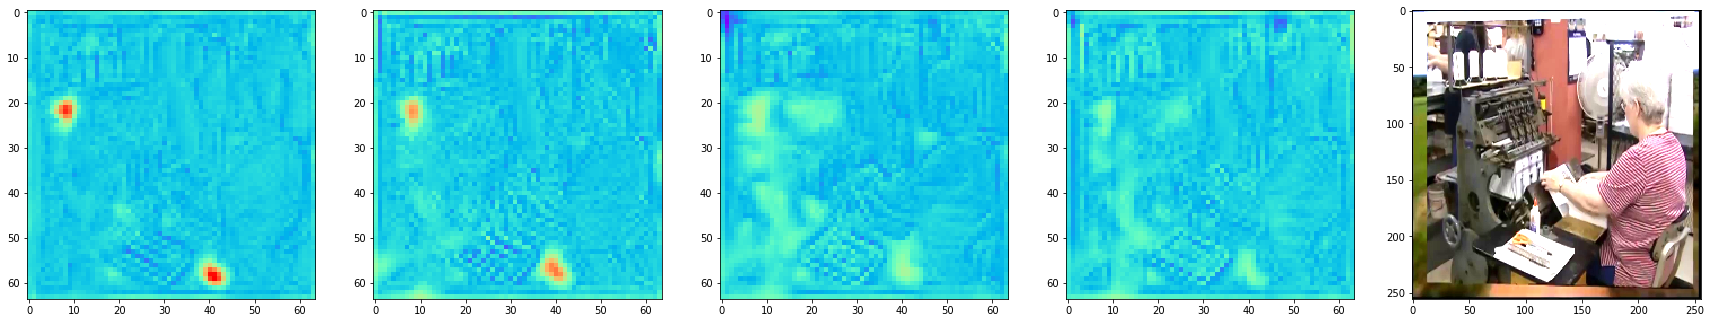

In [126]:
channel = 't12'
img_num = 3
cmap = 'rainbow'

map_Paprika = np.mean((net_Paprika[channel][img_num]), axis=0)
map_Hayao = np.mean((net_Hayao[channel][img_num]), axis=0)
map_Hosoda = np.mean((net_Hosoda[channel][img_num]), axis=0)
map_Shinkai = np.mean((net_Shinkai[channel][img_num]), axis=0)

vmin = np.min([map_Paprika, map_Hayao, map_Hosoda, map_Shinkai])
vmax = np.max([map_Paprika, map_Hayao, map_Hosoda, map_Shinkai])

fig, axs = plt.subplots(1, 5)
axs[0].imshow(map_Paprika, cmap=cmap, vmin=vmin, vmax=vmax)
axs[1].imshow(map_Hayao, cmap=cmap, vmin=vmin, vmax=vmax)
axs[2].imshow(map_Hosoda, cmap=cmap, vmin=vmin, vmax=vmax)
axs[3].imshow(map_Shinkai, cmap=cmap, vmin=vmin, vmax=vmax)
axs[4].imshow(image[img_num].numpy().transpose((1,2,0))[:,:,[2,1,0]]+1)

